<a href="https://colab.research.google.com/github/dindarhma/UTS-ML/blob/main/UTS%20ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy Score (Decision Tree): 0.9122807017543859
Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.84      0.94      0.89        63
           1       0.96      0.90      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.92      0.91       171
weighted avg       0.92      0.91      0.91       171

Accuracy Score (Random Forest): 0.9649122807017544
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.94      0.97      0.95        63
           1       0.98      0.96      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.97      0.96       171
weighted avg       0.97      0.96      0.97       171

Accuracy Score (Self-Training): 0.9239766081871345
Classification Report (Self-Training):
              precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.9/dist-packages/sklearn/semi_supervised/_self_training.py:212: UserWarning: y contains no unlabeled samples
  warnings.warn("y contains no unlabeled samples", UserWarning)


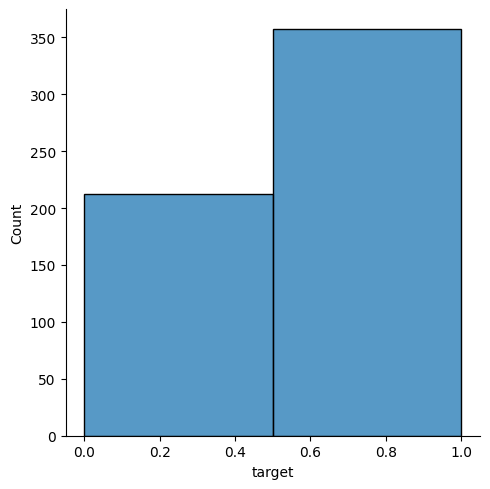

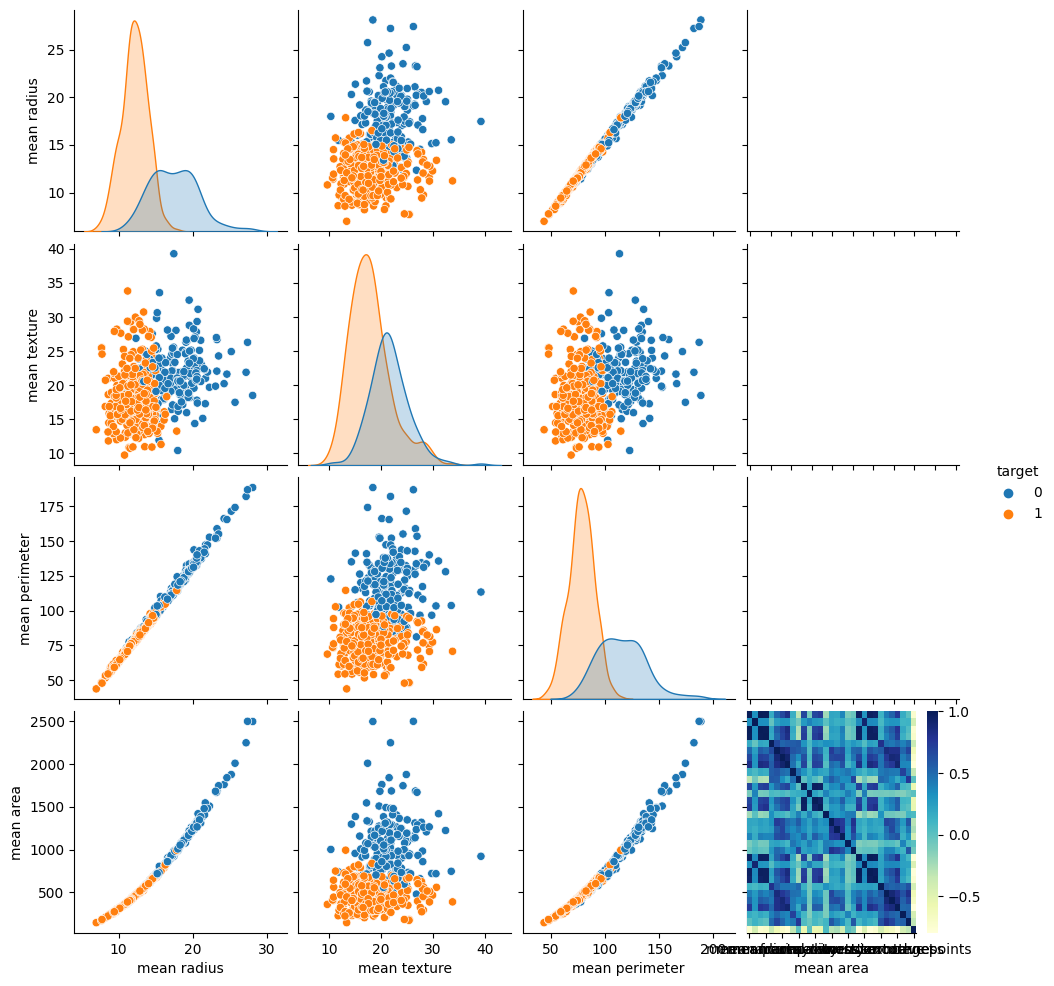

In [2]:
# Import library yang dibutuhkan
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Load dataset
breast_cancer = load_breast_cancer()

# Membuat dataframe dari dataset
data = pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names)
data['target'] = pd.Series(breast_cancer.target)

# Menampilkan grafik distribusi target
sns.displot(data=data, x="target", bins=2)

# Menampilkan grafik korelasi fitur
sns.pairplot(data=data, vars=['mean radius', 'mean texture', 'mean perimeter', 'mean area'], hue="target")

# Menampilkan heatmap korelasi fitur
sns.heatmap(data.corr(), cmap="YlGnBu")
# Import library untuk model machine learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Pisahkan data ke dalam data training dan testing
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['target'], test_size=0.3, random_state=0)

# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Accuracy Score (Decision Tree):", accuracy_score(y_test, y_pred_dt))
print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Accuracy Score (Random Forest):", accuracy_score(y_test, y_pred_rf))
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Self-Training
from sklearn.semi_supervised import SelfTrainingClassifier
st = SelfTrainingClassifier(DecisionTreeClassifier(), threshold=0.9)
st.fit(X_train, y_train)
y_pred_st = st.predict(X_test)
print("Accuracy Score (Self-Training):", accuracy_score(y_test, y_pred_st))
print("Classification Report (Self-Training):")
print(classification_report(y_test, y_pred_st))
